# Ernesto Antonio Reyes Ramírez

# Optimización

# Tarea 9

In [1]:
#Librerias utiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from matplotlib.pyplot import figure

In [2]:
#Función para leer los histogramas y crear los cubos
def leer_histograma(path_hist):
    hist = pd.read_csv(path_hist, sep = "\r\n",engine = "python",header = None).loc[:,0].values.tolist()
    
    dim = hist[0].split()
    dim = (int(dim[0]),int(dim[1]),int(dim[2]))
    
    hist = hist[1:]
    hist = np.array([int(w) for w in hist])
    hist = hist.reshape(dim[0],dim[1],dim[2])
    
    return hist

In [3]:
#Función f definida en la tarea
def f(c,alpha,mu,sigma,n):
    val = sum([alpha[l]*np.exp(-np.linalg.norm(c - mu[3*l:3*(l+1)])**2/(2*sigma**2)) for l in range(n)])   
    return val

In [4]:
#Función que calcula el gradiente de alpha
def grad_alfa(hist, n,alpha, mu, sigma):
    ret = np.zeros(n)
    local = np.zeros(n)

    for i in range(hist.shape[0]):
        for j in range(hist.shape[1]):
            for k in range(hist.shape[2]):
                for l in range(n):
                    density = -((np.array([i,j,k])-mu[3*l:3*(l+1)])**2).sum()
                    density = density/(2*(sigma**2))
                    density = np.exp(density)
                    local[i] = -density
                sumexp = (-alpha*local).sum()
                ret += 2*(hist[i,j,k]-sumexp)*local
    return ret

In [5]:
#Función que calcula el gradiente de mu
def grad_mu(hist, n,alpha, mu, sigma):
    ret = np.zeros(3*n)
    local1 = np.zeros(n)
    local2 = np.zeros(3*n)

    for i in range(hist.shape[0]):
        for j in range(hist.shape[1]):
            for k in range(hist.shape[2]):
                for l in range(n):
                    density = -(( np.array([i,j,k]) - mu[3*l:3*(l+1)])**2).sum()
                    density = density/(2*(sigma**2))
                    density = np.exp(density)
                    local2[3*l:3*(l+1)] = density*((alpha[l])/sigma**2)*(mu[3*l:3*(l+1)] - np.array([i,j,k]) )
                    local1[l] = density
                sumexp = (-alpha*local1).sum()
                ret += 2*(hist[i,j,k]+sumexp)*local2
    return ret

In [6]:
#Función de descenso de gradiente 
def descenso_gradiente(alpha_0,mu_0,grad_alfa,grad_mu,alpha,tol,ite,hist,sigma,n):
    alfa = alpha_0
    mu = mu_0
    
    for i in range(ite):
        da = grad_alfa(hist, n,alfa, mu, sigma)
        dm = grad_mu(hist, n,alfa, mu, sigma)
        
        print(np.linalg.norm(da),np.linalg.norm(dm))
        
        alfa = alfa - alpha*da
        mu = mu - alpha*dm
        
    return alfa, mu

### Leemos los histogramas

Los histogramas fueron generados mediante el programa en python que nos fue proporcionado.

In [7]:
hist_0 = leer_histograma("histograms/H_0.txt")

In [8]:
hist_1 = leer_histograma("histograms/H_1.txt")

In [13]:
bins = hist_0.shape[0]  # Número de bins
alpha_0 = np.random.rand(bins) # Alpha 0 aleatorio
mu_0 = np.random.rand(3*bins)  # mu 0 aleatorio 

tol = 1e-5
alpha = 1e-3  #tamaño de paso
sigma = 1.0  #valor de sigma
ite = 10000 #número de iteraciones

### Calculamos el mínimo de los dos histogramas

In [14]:
alfa1, mu1 = descenso_gradiente(alpha_0,mu_0,grad_alfa,grad_mu,alpha,tol,ite,hist_0,sigma,bins)

22281.01822797374 21325.813144173066
5.216911153078303e-22 2.612395959489347e-08
5.216911153078303e-22 2.6123959600361915e-08
5.216911153078303e-22 2.6123959605830363e-08
5.216911153078303e-22 2.6123959611298807e-08
5.216911153078303e-22 2.612395961676725e-08
5.216911153078303e-22 2.6123959622235703e-08
5.216911153078303e-22 2.6123959627704337e-08
5.216911153078303e-22 2.612395963317277e-08
5.216911153078303e-22 2.6123959638641034e-08
5.216911153078303e-22 2.612395964410948e-08
5.216911153078303e-22 2.612395964957811e-08
5.216911153078303e-22 2.612395965504656e-08
5.216911153078303e-22 2.6123959660515005e-08
5.216911153078303e-22 2.6123959665983453e-08
5.216911153078303e-22 2.6123959671452083e-08
5.216911153078303e-22 2.612395967692053e-08
5.216911153078303e-22 2.6123959682388976e-08
5.216911153078303e-22 2.612395968785742e-08
5.216911153078303e-22 2.6123959693325865e-08
5.216911153078303e-22 2.6123959698794313e-08
5.216911153078303e-22 2.6123959704262764e-08
5.216911153078303e-22 2.61

5.216911153078303e-22 2.6123961295588185e-08
5.216911153078303e-22 2.6123961301056447e-08
5.216911153078303e-22 2.6123961306525077e-08
5.216911153078303e-22 2.6123961311993522e-08
5.216911153078303e-22 2.612396131746197e-08
5.216911153078303e-22 2.612396132293042e-08
5.216911153078303e-22 2.6123961328398863e-08
5.216911153078303e-22 2.6123961333867496e-08
5.216911153078303e-22 2.6123961339335938e-08
5.216911153078303e-22 2.612396134480439e-08
5.216911153078303e-22 2.6123961350272827e-08
5.216911153078303e-22 2.6123961355741278e-08
5.216911153078303e-22 2.6123961361209723e-08
5.216911153078303e-22 2.612396136667817e-08
5.216911153078303e-22 2.6123961372146798e-08
5.216911153078303e-22 2.6123961377615252e-08
5.216911153078303e-22 2.612396138308351e-08
5.216911153078303e-22 2.612396138855214e-08
5.216911153078303e-22 2.6123961394020586e-08
5.216911153078303e-22 2.6123961399489034e-08
5.216911153078303e-22 2.6123961404957482e-08
5.216911153078303e-22 2.6123961410426112e-08
5.21691115307830

5.216911153078303e-22 2.6123962952535256e-08
5.216911153078303e-22 2.6123962958003704e-08
5.216911153078303e-22 2.6123962963472142e-08
5.216911153078303e-22 2.612396296894059e-08
5.216911153078303e-22 2.6123962974409038e-08
5.216911153078303e-22 2.6123962979877483e-08
5.216911153078303e-22 2.612396298534612e-08
5.216911153078303e-22 2.612396299081438e-08
5.216911153078303e-22 2.612396299628301e-08
5.216911153078303e-22 2.6123963001751457e-08
5.216911153078303e-22 2.6123963007219908e-08
5.216911153078303e-22 2.612396301268835e-08
5.216911153078303e-22 2.61239630181568e-08
5.216911153078303e-22 2.6123963023625245e-08
5.216911153078303e-22 2.6123963029093693e-08
5.216911153078303e-22 2.612396303456232e-08
5.216911153078303e-22 2.6123963040030768e-08
5.216911153078303e-22 2.6123963045499213e-08
5.216911153078303e-22 2.612396305096767e-08
5.216911153078303e-22 2.6123963056436112e-08
5.216911153078303e-22 2.6123963061904557e-08
5.216911153078303e-22 2.6123963067373184e-08
5.216911153078303e-

5.216911153078303e-22 2.612396458760845e-08
5.216911153078303e-22 2.6123964593076897e-08
5.216911153078303e-22 2.6123964598545345e-08
5.216911153078303e-22 2.6123964604013793e-08
5.216911153078303e-22 2.612396460948224e-08
5.216911153078303e-22 2.612396461495087e-08
5.216911153078303e-22 2.612396462041932e-08
5.216911153078303e-22 2.6123964625887767e-08
5.216911153078303e-22 2.612396463135621e-08
5.216911153078303e-22 2.612396463682466e-08
5.216911153078303e-22 2.6123964642293108e-08
5.216911153078303e-22 2.612396464776155e-08
5.216911153078303e-22 2.6123964653230182e-08
5.216911153078303e-22 2.6123964658698634e-08
5.216911153078303e-22 2.6123964664167082e-08
5.216911153078303e-22 2.6123964669635526e-08
5.216911153078303e-22 2.6123964675103974e-08
5.216911153078303e-22 2.6123964680572416e-08
5.216911153078303e-22 2.6123964686040864e-08
5.216911153078303e-22 2.6123964691509312e-08
5.216911153078303e-22 2.6123964696977945e-08
5.216911153078303e-22 2.6123964702446393e-08
5.216911153078303

5.216911153078303e-22 2.612396634298815e-08
5.216911153078303e-22 2.6123966348456595e-08
5.216911153078303e-22 2.6123966353925043e-08
5.216911153078303e-22 2.6123966359393673e-08
5.216911153078303e-22 2.612396636486212e-08
5.216911153078303e-22 2.6123966370330572e-08
5.216911153078303e-22 2.6123966375799202e-08
5.216911153078303e-22 2.6123966381267465e-08
5.216911153078303e-22 2.6123966386735916e-08
5.216911153078303e-22 2.612396639220455e-08
5.216911153078303e-22 2.6123966397672994e-08
5.216911153078303e-22 2.6123966403141442e-08
5.216911153078303e-22 2.612396640860989e-08
5.216911153078303e-22 2.6123966414078335e-08
5.216911153078303e-22 2.6123966419546783e-08
5.216911153078303e-22 2.612396642501523e-08
5.216911153078303e-22 2.6123966430483864e-08
5.216911153078303e-22 2.6123966435952127e-08
5.216911153078303e-22 2.6123966441420757e-08
5.216911153078303e-22 2.61239664468892e-08
5.216911153078303e-22 2.6123966452357656e-08
5.216911153078303e-22 2.6123966457826098e-08
5.216911153078303

5.216911153078303e-22 2.6123968081962623e-08
5.216911153078303e-22 2.6123968087431068e-08
5.216911153078303e-22 2.6123968092899516e-08
5.216911153078303e-22 2.612396809836815e-08
5.216911153078303e-22 2.6123968103836597e-08
5.216911153078303e-22 2.612396810930504e-08
5.216911153078303e-22 2.612396811477349e-08
5.216911153078303e-22 2.6123968120242126e-08
5.216911153078303e-22 2.6123968125710386e-08
5.216911153078303e-22 2.6123968131178834e-08
5.216911153078303e-22 2.6123968136647467e-08
5.216911153078303e-22 2.612396814211592e-08
5.216911153078303e-22 2.6123968147584366e-08
5.216911153078303e-22 2.6123968153052814e-08
5.216911153078303e-22 2.6123968158521256e-08
5.216911153078303e-22 2.6123968163989707e-08
5.216911153078303e-22 2.6123968169458155e-08
5.216911153078303e-22 2.612396817492679e-08
5.216911153078303e-22 2.6123968180395054e-08
5.216911153078303e-22 2.612396818586369e-08
5.216911153078303e-22 2.6123968191332136e-08
5.216911153078303e-22 2.6123968196800587e-08
5.21691115307830

5.216911153078303e-22 2.6123969656883027e-08
5.216911153078303e-22 2.6123969662351475e-08
5.216911153078303e-22 2.612396966781993e-08
5.216911153078303e-22 2.6123969673288377e-08
5.216911153078303e-22 2.612396967875701e-08
5.216911153078303e-22 2.6123969684225452e-08
5.216911153078303e-22 2.6123969689693903e-08
5.216911153078303e-22 2.612396969516235e-08
5.216911153078303e-22 2.61239697006308e-08
5.216911153078303e-22 2.612396970609924e-08
5.216911153078303e-22 2.612396971156769e-08
5.216911153078303e-22 2.6123969717036332e-08
5.216911153078303e-22 2.6123969722504777e-08
5.216911153078303e-22 2.612396972797322e-08
5.216911153078303e-22 2.612396973344167e-08
5.216911153078303e-22 2.612396973891012e-08
5.216911153078303e-22 2.612396974437857e-08
5.216911153078303e-22 2.6123969749847014e-08
5.216911153078303e-22 2.6123969755315647e-08
5.216911153078303e-22 2.6123969760783906e-08
5.216911153078303e-22 2.612396976625254e-08
5.216911153078303e-22 2.6123969771720984e-08
5.216911153078303e-22 

5.216911153078303e-22 2.6123971379452185e-08
5.216911153078303e-22 2.6123971384920825e-08
5.216911153078303e-22 2.612397139038927e-08
5.216911153078303e-22 2.612397139585772e-08
5.216911153078303e-22 2.6123971401326166e-08
5.216911153078303e-22 2.6123971406794614e-08
5.216911153078303e-22 2.6123971412263062e-08
5.216911153078303e-22 2.6123971417731695e-08
5.216911153078303e-22 2.612397142320015e-08
5.216911153078303e-22 2.6123971428668598e-08
5.216911153078303e-22 2.612397143413705e-08
5.216911153078303e-22 2.6123971439605497e-08
5.216911153078303e-22 2.6123971445073942e-08
5.216911153078303e-22 2.612397145054239e-08
5.216911153078303e-22 2.6123971456010838e-08
5.216911153078303e-22 2.6123971461479478e-08
5.216911153078303e-22 2.612397146694793e-08
5.216911153078303e-22 2.6123971472416367e-08
5.216911153078303e-22 2.6123971477884822e-08
5.216911153078303e-22 2.6123971483353264e-08
5.216911153078303e-22 2.6123971488821715e-08
5.216911153078303e-22 2.6123971494290163e-08
5.21691115307830

5.216911153078303e-22 2.6123973047336976e-08
5.216911153078303e-22 2.6123973052805428e-08
5.216911153078303e-22 2.6123973058273876e-08
5.216911153078303e-22 2.6123973063742324e-08
5.216911153078303e-22 2.6123973069210775e-08
5.216911153078303e-22 2.6123973074679223e-08
5.216911153078303e-22 2.6123973080147674e-08
5.216911153078303e-22 2.61239730856163e-08
5.216911153078303e-22 2.612397309108476e-08
5.216911153078303e-22 2.61239730965532e-08
5.216911153078303e-22 2.6123973102021652e-08
5.216911153078303e-22 2.6123973107490282e-08
5.216911153078303e-22 2.612397311295855e-08
5.216911153078303e-22 2.6123973118426996e-08
5.216911153078303e-22 2.612397312389563e-08
5.216911153078303e-22 2.612397312936408e-08
5.216911153078303e-22 2.612397313483253e-08
5.216911153078303e-22 2.6123973140300983e-08
5.216911153078303e-22 2.6123973145769428e-08
5.216911153078303e-22 2.6123973151237876e-08
5.216911153078303e-22 2.612397315670632e-08
5.216911153078303e-22 2.6123973162174964e-08
5.216911153078303e-2

5.216911153078303e-22 2.6123974693347893e-08
5.216911153078303e-22 2.612397469881616e-08
5.216911153078303e-22 2.6123974704284792e-08
5.216911153078303e-22 2.6123974709753243e-08
5.216911153078303e-22 2.6123974715221688e-08
5.216911153078303e-22 2.6123974720690136e-08
5.216911153078303e-22 2.6123974726158587e-08
5.216911153078303e-22 2.612397473162704e-08
5.216911153078303e-22 2.6123974737095483e-08
5.216911153078303e-22 2.6123974742563935e-08
5.216911153078303e-22 2.612397474803257e-08
5.216911153078303e-22 2.6123974753501026e-08
5.216911153078303e-22 2.6123974758969467e-08
5.216911153078303e-22 2.6123974764437915e-08
5.216911153078303e-22 2.612397476990655e-08
5.216911153078303e-22 2.6123974775374997e-08
5.216911153078303e-22 2.6123974780843263e-08
5.216911153078303e-22 2.61239747863119e-08
5.216911153078303e-22 2.6123974791780344e-08
5.216911153078303e-22 2.6123974797248792e-08
5.216911153078303e-22 2.6123974802717247e-08
5.216911153078303e-22 2.6123974808185877e-08
5.21691115307830

5.216911153078303e-22 2.61239763831065e-08
5.216911153078303e-22 2.612397638857496e-08
5.216911153078303e-22 2.6123976394043405e-08
5.216911153078303e-22 2.612397639951185e-08
5.216911153078303e-22 2.6123976404980308e-08
5.216911153078303e-22 2.6123976410448934e-08
5.216911153078303e-22 2.6123976415917382e-08
5.216911153078303e-22 2.6123976421385837e-08
5.216911153078303e-22 2.612397642685428e-08
5.216911153078303e-22 2.612397643232274e-08
5.216911153078303e-22 2.612397643779137e-08
5.216911153078303e-22 2.6123976443259632e-08
5.216911153078303e-22 2.6123976448728272e-08
5.216911153078303e-22 2.6123976454196717e-08
5.216911153078303e-22 2.612397645966517e-08
5.216911153078303e-22 2.6123976465133613e-08
5.216911153078303e-22 2.6123976470602064e-08
5.216911153078303e-22 2.6123976476070522e-08
5.216911153078303e-22 2.6123976481538967e-08
5.216911153078303e-22 2.612397648700742e-08
5.216911153078303e-22 2.6123976492476048e-08
5.216911153078303e-22 2.6123976497944503e-08
5.216911153078303e-

5.216911153078303e-22 2.612397801271209e-08
5.216911153078303e-22 2.6123978018180734e-08
5.216911153078303e-22 2.6123978023648997e-08
5.216911153078303e-22 2.612397802911744e-08
5.216911153078303e-22 2.6123978034586078e-08
5.216911153078303e-22 2.6123978040054523e-08
5.216911153078303e-22 2.6123978045522984e-08
5.216911153078303e-22 2.6123978050991422e-08
5.216911153078303e-22 2.6123978056460066e-08
5.216911153078303e-22 2.6123978061928325e-08
5.216911153078303e-22 2.612397806739678e-08
5.216911153078303e-22 2.612397807286541e-08
5.216911153078303e-22 2.6123978078333864e-08
5.216911153078303e-22 2.6123978083802312e-08
5.216911153078303e-22 2.612397808927076e-08
5.216911153078303e-22 2.61239780947394e-08
5.216911153078303e-22 2.6123978100207848e-08
5.216911153078303e-22 2.612397810567611e-08
5.216911153078303e-22 2.6123978111144747e-08
5.216911153078303e-22 2.6123978116613196e-08
5.216911153078303e-22 2.6123978122081647e-08
5.216911153078303e-22 2.6123978127550095e-08
5.216911153078303e

5.216911153078303e-22 2.6123979620443977e-08
5.216911153078303e-22 2.612397962591243e-08
5.216911153078303e-22 2.612397963138088e-08
5.216911153078303e-22 2.6123979636849334e-08
5.216911153078303e-22 2.6123979642317786e-08
5.216911153078303e-22 2.6123979647786234e-08
5.216911153078303e-22 2.6123979653254688e-08
5.216911153078303e-22 2.6123979658723318e-08
5.216911153078303e-22 2.6123979664191776e-08
5.216911153078303e-22 2.6123979669660218e-08
5.216911153078303e-22 2.6123979675128675e-08
5.216911153078303e-22 2.6123979680597305e-08
5.216911153078303e-22 2.6123979686065578e-08
5.216911153078303e-22 2.6123979691534205e-08
5.216911153078303e-22 2.6123979697002663e-08
5.216911153078303e-22 2.6123979702471107e-08
5.216911153078303e-22 2.6123979707939562e-08
5.216911153078303e-22 2.612397971340801e-08
5.216911153078303e-22 2.6123979718876458e-08
5.216911153078303e-22 2.6123979724344906e-08
5.216911153078303e-22 2.6123979729813357e-08
5.216911153078303e-22 2.6123979735282e-08
5.21691115307830

5.216911153078303e-22 2.6123981222707336e-08
5.216911153078303e-22 2.612398122817578e-08
5.216911153078303e-22 2.6123981233644235e-08
5.216911153078303e-22 2.612398123911287e-08
5.216911153078303e-22 2.612398124458132e-08
5.216911153078303e-22 2.6123981250049777e-08
5.216911153078303e-22 2.6123981255518225e-08
5.216911153078303e-22 2.6123981260986673e-08
5.216911153078303e-22 2.6123981266455128e-08
5.216911153078303e-22 2.6123981271923576e-08
5.216911153078303e-22 2.6123981277392213e-08
5.216911153078303e-22 2.6123981282860664e-08
5.216911153078303e-22 2.6123981288329115e-08
5.216911153078303e-22 2.6123981293797567e-08
5.216911153078303e-22 2.6123981299266015e-08
5.216911153078303e-22 2.6123981304734466e-08
5.216911153078303e-22 2.612398131020291e-08
5.216911153078303e-22 2.6123981315671365e-08
5.216911153078303e-22 2.6123981321140002e-08
5.216911153078303e-22 2.612398132660845e-08
5.216911153078303e-22 2.6123981332076905e-08
5.216911153078303e-22 2.6123981337545356e-08
5.2169111530783

5.216911153078303e-22 2.6123982797628533e-08
5.216911153078303e-22 2.6123982803096988e-08
5.216911153078303e-22 2.6123982808565436e-08
5.216911153078303e-22 2.6123982814033887e-08
5.216911153078303e-22 2.612398281950234e-08
5.216911153078303e-22 2.612398282497097e-08
5.216911153078303e-22 2.6123982830439423e-08
5.216911153078303e-22 2.6123982835907878e-08
5.216911153078303e-22 2.6123982841376326e-08
5.216911153078303e-22 2.6123982846844956e-08
5.216911153078303e-22 2.612398285231323e-08
5.216911153078303e-22 2.6123982857781683e-08
5.216911153078303e-22 2.612398286325032e-08
5.216911153078303e-22 2.6123982868718765e-08
5.216911153078303e-22 2.612398287418722e-08
5.216911153078303e-22 2.6123982879655664e-08
5.216911153078303e-22 2.6123982885124122e-08
5.216911153078303e-22 2.6123982890592567e-08
5.216911153078303e-22 2.612398289606102e-08
5.216911153078303e-22 2.6123982901529658e-08
5.216911153078303e-22 2.6123982906998106e-08
5.216911153078303e-22 2.6123982912466554e-08
5.21691115307830

5.216911153078303e-22 2.612398439442363e-08
5.216911153078303e-22 2.6123984399892084e-08
5.216911153078303e-22 2.6123984405360532e-08
5.216911153078303e-22 2.612398441082917e-08
5.216911153078303e-22 2.6123984416297623e-08
5.216911153078303e-22 2.6123984421766074e-08
5.216911153078303e-22 2.612398442723452e-08
5.216911153078303e-22 2.6123984432702974e-08
5.216911153078303e-22 2.6123984438171425e-08
5.216911153078303e-22 2.612398444363988e-08
5.216911153078303e-22 2.6123984449108513e-08
5.216911153078303e-22 2.6123984454576964e-08
5.216911153078303e-22 2.6123984460045412e-08
5.216911153078303e-22 2.612398446551387e-08
5.216911153078303e-22 2.612398447098232e-08
5.216911153078303e-22 2.612398447645077e-08
5.216911153078303e-22 2.6123984481919406e-08
5.216911153078303e-22 2.612398448738767e-08
5.216911153078303e-22 2.6123984492856306e-08
5.216911153078303e-22 2.6123984498324757e-08
5.216911153078303e-22 2.612398450379321e-08
5.216911153078303e-22 2.6123984509261663e-08
5.216911153078303e-

5.216911153078303e-22 2.6123986138867758e-08
5.216911153078303e-22 2.6123986144336213e-08
5.216911153078303e-22 2.6123986149804657e-08
5.216911153078303e-22 2.612398615527329e-08
5.216911153078303e-22 2.6123986160741752e-08
5.216911153078303e-22 2.61239861662102e-08
5.216911153078303e-22 2.6123986171678658e-08
5.216911153078303e-22 2.6123986177147106e-08
5.216911153078303e-22 2.6123986182615547e-08
5.216911153078303e-22 2.6123986188084187e-08
5.216911153078303e-22 2.6123986193552453e-08
5.216911153078303e-22 2.6123986199021103e-08
5.216911153078303e-22 2.612398620448955e-08
5.216911153078303e-22 2.6123986209958002e-08
5.216911153078303e-22 2.6123986215426447e-08
5.216911153078303e-22 2.6123986220894902e-08
5.216911153078303e-22 2.6123986226363538e-08
5.216911153078303e-22 2.6123986231831804e-08
5.216911153078303e-22 2.6123986237300444e-08
5.216911153078303e-22 2.612398624276889e-08
5.216911153078303e-22 2.6123986248237344e-08
5.216911153078303e-22 2.612398625370598e-08
5.21691115307830

5.216911153078303e-22 2.6123987752068598e-08
5.216911153078303e-22 2.6123987757537053e-08
5.216911153078303e-22 2.6123987763005504e-08
5.216911153078303e-22 2.612398776847396e-08
5.216911153078303e-22 2.6123987773942595e-08
5.216911153078303e-22 2.6123987779411047e-08
5.216911153078303e-22 2.6123987784879498e-08
5.216911153078303e-22 2.612398779034795e-08
5.216911153078303e-22 2.61239877958164e-08
5.216911153078303e-22 2.6123987801284852e-08
5.216911153078303e-22 2.612398780675331e-08
5.216911153078303e-22 2.612398781222176e-08
5.216911153078303e-22 2.6123987817690395e-08
5.216911153078303e-22 2.6123987823158846e-08
5.216911153078303e-22 2.6123987828627294e-08
5.216911153078303e-22 2.6123987834095745e-08
5.216911153078303e-22 2.6123987839564197e-08
5.216911153078303e-22 2.6123987845032645e-08
5.216911153078303e-22 2.6123987850501106e-08
5.216911153078303e-22 2.612398785596974e-08
5.216911153078303e-22 2.612398786143819e-08
5.216911153078303e-22 2.612398786690665e-08
5.216911153078303e-

5.216911153078303e-22 2.6123989387143353e-08
5.216911153078303e-22 2.61239893926118e-08
5.216911153078303e-22 2.6123989398080256e-08
5.216911153078303e-22 2.612398940354889e-08
5.216911153078303e-22 2.6123989409017347e-08
5.216911153078303e-22 2.6123989414485613e-08
5.216911153078303e-22 2.6123989419954253e-08
5.216911153078303e-22 2.6123989425422704e-08
5.216911153078303e-22 2.612398943089116e-08
5.216911153078303e-22 2.6123989436359792e-08
5.216911153078303e-22 2.6123989441828055e-08
5.216911153078303e-22 2.6123989447296695e-08
5.216911153078303e-22 2.6123989452765146e-08
5.216911153078303e-22 2.6123989458233597e-08
5.216911153078303e-22 2.612398946370205e-08
5.216911153078303e-22 2.61239894691705e-08
5.216911153078303e-22 2.612398947463895e-08
5.216911153078303e-22 2.6123989480107403e-08
5.216911153078303e-22 2.6123989485576046e-08
5.216911153078303e-22 2.6123989491044494e-08
5.216911153078303e-22 2.6123989496512945e-08
5.216911153078303e-22 2.6123989501981403e-08
5.216911153078303e

5.216911153078303e-22 2.6123990962065037e-08
5.216911153078303e-22 2.6123990967533492e-08
5.216911153078303e-22 2.612399097300195e-08
5.216911153078303e-22 2.61239909784704e-08
5.216911153078303e-22 2.6123990983938852e-08
5.216911153078303e-22 2.6123990989407486e-08
5.216911153078303e-22 2.6123990994875755e-08
5.216911153078303e-22 2.6123991000344392e-08
5.216911153078303e-22 2.6123991005812843e-08
5.216911153078303e-22 2.6123991011281294e-08
5.216911153078303e-22 2.6123991016749746e-08
5.216911153078303e-22 2.6123991022218204e-08
5.216911153078303e-22 2.6123991027686844e-08
5.216911153078303e-22 2.6123991033155298e-08
5.216911153078303e-22 2.6123991038623746e-08
5.216911153078303e-22 2.6123991044092197e-08
5.216911153078303e-22 2.6123991049560652e-08
5.216911153078303e-22 2.6123991055029107e-08
5.216911153078303e-22 2.6123991060497555e-08
5.216911153078303e-22 2.612399106596619e-08
5.216911153078303e-22 2.6123991071434643e-08
5.216911153078303e-22 2.612399107690291e-08
5.2169111530783

5.216911153078303e-22 2.612399202294967e-08
5.216911153078303e-22 2.6123992028418306e-08
5.216911153078303e-22 2.6123992033886758e-08
5.216911153078303e-22 2.612399203935521e-08
5.216911153078303e-22 2.612399204482366e-08
5.216911153078303e-22 2.6123992050292297e-08
5.216911153078303e-22 2.6123992055760566e-08
5.216911153078303e-22 2.612399206122902e-08
5.216911153078303e-22 2.6123992066697658e-08
5.216911153078303e-22 2.6123992072166112e-08
5.216911153078303e-22 2.6123992077634567e-08
5.216911153078303e-22 2.612399208310302e-08
5.216911153078303e-22 2.6123992088571476e-08
5.216911153078303e-22 2.6123992094039924e-08
5.216911153078303e-22 2.612399209950838e-08
5.216911153078303e-22 2.6123992104977015e-08
5.216911153078303e-22 2.6123992110445467e-08
5.216911153078303e-22 2.6123992115913918e-08
5.216911153078303e-22 2.6123992121382366e-08
5.216911153078303e-22 2.612399212685082e-08
5.216911153078303e-22 2.612399213231946e-08
5.216911153078303e-22 2.6123992137787733e-08
5.216911153078303e

5.216911153078303e-22 2.6123993636150874e-08
5.216911153078303e-22 2.6123993641619325e-08
5.216911153078303e-22 2.6123993647087962e-08
5.216911153078303e-22 2.6123993652556417e-08
5.216911153078303e-22 2.612399365802487e-08
5.216911153078303e-22 2.612399366349332e-08
5.216911153078303e-22 2.612399366896178e-08
5.216911153078303e-22 2.612399367443023e-08
5.216911153078303e-22 2.612399367989868e-08
5.216911153078303e-22 2.612399368536732e-08
5.216911153078303e-22 2.612399369083559e-08
5.216911153078303e-22 2.6123993696304226e-08
5.216911153078303e-22 2.6123993701772687e-08
5.216911153078303e-22 2.6123993707241135e-08
5.216911153078303e-22 2.612399371270959e-08
5.216911153078303e-22 2.6123993718178038e-08
5.216911153078303e-22 2.6123993723646492e-08
5.216911153078303e-22 2.6123993729115126e-08
5.216911153078303e-22 2.6123993734583587e-08
5.216911153078303e-22 2.6123993740052038e-08
5.216911153078303e-22 2.6123993745520493e-08
5.216911153078303e-22 2.612399375098894e-08
5.216911153078303e-

5.216911153078303e-22 2.6123995413406525e-08
5.216911153078303e-22 2.6123995418874976e-08
5.216911153078303e-22 2.6123995424343434e-08
5.216911153078303e-22 2.612399542981188e-08
5.216911153078303e-22 2.6123995435280336e-08
5.216911153078303e-22 2.6123995440748976e-08
5.216911153078303e-22 2.6123995446217424e-08
5.216911153078303e-22 2.612399545168588e-08
5.216911153078303e-22 2.612399545715452e-08
5.216911153078303e-22 2.6123995462622788e-08
5.216911153078303e-22 2.6123995468091236e-08
5.216911153078303e-22 2.6123995473559876e-08
5.216911153078303e-22 2.6123995479028337e-08
5.216911153078303e-22 2.612399548449679e-08
5.216911153078303e-22 2.612399548996524e-08
5.216911153078303e-22 2.612399549543369e-08
5.216911153078303e-22 2.6123995500902143e-08
5.216911153078303e-22 2.6123995506370604e-08
5.216911153078303e-22 2.6123995511839055e-08
5.216911153078303e-22 2.6123995517307692e-08
5.216911153078303e-22 2.6123995522776147e-08
5.216911153078303e-22 2.6123995528244598e-08
5.21691115307830

5.216911153078303e-22 2.612399707035575e-08
5.216911153078303e-22 2.6123997075824204e-08
5.216911153078303e-22 2.6123997081292656e-08
5.216911153078303e-22 2.6123997086761114e-08
5.216911153078303e-22 2.612399709222957e-08
5.216911153078303e-22 2.612399709769802e-08
5.216911153078303e-22 2.612399710316666e-08
5.216911153078303e-22 2.6123997108635114e-08
5.216911153078303e-22 2.612399711410357e-08
5.216911153078303e-22 2.6123997119572017e-08
5.216911153078303e-22 2.6123997125040468e-08
5.216911153078303e-22 2.6123997130508933e-08
5.216911153078303e-22 2.6123997135977566e-08
5.216911153078303e-22 2.6123997141445835e-08
5.216911153078303e-22 2.612399714691448e-08
5.216911153078303e-22 2.612399715238293e-08
5.216911153078303e-22 2.612399715785138e-08
5.216911153078303e-22 2.6123997163319836e-08
5.216911153078303e-22 2.612399716878829e-08
5.216911153078303e-22 2.6123997174256742e-08
5.216911153078303e-22 2.6123997179725196e-08
5.216911153078303e-22 2.612399718519384e-08
5.216911153078303e-2

5.216911153078303e-22 2.6123998743710448e-08
5.216911153078303e-22 2.61239987491789e-08
5.216911153078303e-22 2.6123998754647357e-08
5.216911153078303e-22 2.6123998760115812e-08
5.216911153078303e-22 2.612399876558445e-08
5.216911153078303e-22 2.6123998771052903e-08
5.216911153078303e-22 2.612399877652136e-08
5.216911153078303e-22 2.612399878198963e-08
5.216911153078303e-22 2.612399878745827e-08
5.216911153078303e-22 2.612399879292672e-08
5.216911153078303e-22 2.6123998798395176e-08
5.216911153078303e-22 2.6123998803863627e-08
5.216911153078303e-22 2.6123998809332267e-08
5.216911153078303e-22 2.6123998814800722e-08
5.216911153078303e-22 2.6123998820269173e-08
5.216911153078303e-22 2.612399882573763e-08
5.216911153078303e-22 2.6123998831206093e-08
5.216911153078303e-22 2.612399883667454e-08
5.216911153078303e-22 2.6123998842142995e-08
5.216911153078303e-22 2.6123998847611446e-08
5.216911153078303e-22 2.6123998853080086e-08
5.216911153078303e-22 2.6123998858548538e-08
5.216911153078303e-

5.216911153078303e-22 2.6124000400659888e-08
5.216911153078303e-22 2.612400040612835e-08
5.216911153078303e-22 2.6124000411596797e-08
5.216911153078303e-22 2.6124000417065252e-08
5.216911153078303e-22 2.6124000422533706e-08
5.216911153078303e-22 2.612400042800216e-08
5.216911153078303e-22 2.61240004334708e-08
5.216911153078303e-22 2.612400043893926e-08
5.216911153078303e-22 2.6124000444407525e-08
5.216911153078303e-22 2.612400044987616e-08
5.216911153078303e-22 2.612400045534462e-08
5.216911153078303e-22 2.6124000460813074e-08
5.216911153078303e-22 2.612400046628153e-08
5.216911153078303e-22 2.612400047175017e-08
5.216911153078303e-22 2.6124000477218627e-08
5.216911153078303e-22 2.6124000482687078e-08
5.216911153078303e-22 2.6124000488155347e-08
5.216911153078303e-22 2.612400049362399e-08
5.216911153078303e-22 2.6124000499092442e-08
5.216911153078303e-22 2.6124000504560893e-08
5.216911153078303e-22 2.6124000510029348e-08
5.216911153078303e-22 2.6124000515497994e-08
5.216911153078303e-2

5.216911153078303e-22 2.6124001909960414e-08
5.216911153078303e-22 2.6124001915428872e-08
5.216911153078303e-22 2.612400192089733e-08
5.216911153078303e-22 2.6124001926365775e-08
5.216911153078303e-22 2.6124001931834236e-08
5.216911153078303e-22 2.6124001937302688e-08
5.216911153078303e-22 2.6124001942771146e-08
5.216911153078303e-22 2.6124001948239597e-08
5.216911153078303e-22 2.612400195370824e-08
5.216911153078303e-22 2.6124001959176688e-08
5.216911153078303e-22 2.612400196464515e-08
5.216911153078303e-22 2.6124001970113597e-08
5.216911153078303e-22 2.6124001975582055e-08
5.216911153078303e-22 2.6124001981050695e-08
5.216911153078303e-22 2.6124001986518965e-08
5.216911153078303e-22 2.612400199198742e-08
5.216911153078303e-22 2.6124001997456062e-08
5.216911153078303e-22 2.612400200292452e-08
5.216911153078303e-22 2.6124002008392975e-08
5.216911153078303e-22 2.6124002013861426e-08
5.216911153078303e-22 2.6124002019330066e-08
5.216911153078303e-22 2.6124002024798332e-08
5.2169111530783

5.216911153078303e-22 2.6124003550504507e-08
5.216911153078303e-22 2.6124003555972962e-08
5.216911153078303e-22 2.6124003561441602e-08
5.216911153078303e-22 2.612400356690987e-08
5.216911153078303e-22 2.612400357237833e-08
5.216911153078303e-22 2.612400357784696e-08
5.216911153078303e-22 2.612400358331542e-08
5.216911153078303e-22 2.6124003588783875e-08
5.216911153078303e-22 2.6124003594252336e-08
5.216911153078303e-22 2.6124003599720784e-08
5.216911153078303e-22 2.612400360518925e-08
5.216911153078303e-22 2.6124003610657697e-08
5.216911153078303e-22 2.6124003616126337e-08
5.216911153078303e-22 2.612400362159479e-08
5.216911153078303e-22 2.6124003627063246e-08
5.216911153078303e-22 2.61240036325317e-08
5.216911153078303e-22 2.6124003638000162e-08
5.216911153078303e-22 2.6124003643468613e-08
5.216911153078303e-22 2.6124003648937074e-08
5.216911153078303e-22 2.612400365440552e-08
5.216911153078303e-22 2.6124003659874166e-08
5.216911153078303e-22 2.6124003665342624e-08
5.216911153078303e-

5.216911153078303e-22 2.6124005267607448e-08
5.216911153078303e-22 2.6124005273075903e-08
5.216911153078303e-22 2.6124005278544357e-08
5.216911153078303e-22 2.6124005284012815e-08
5.216911153078303e-22 2.6124005289481452e-08
5.216911153078303e-22 2.612400529494991e-08
5.216911153078303e-22 2.6124005300418364e-08
5.216911153078303e-22 2.612400530588682e-08
5.216911153078303e-22 2.6124005311355274e-08
5.216911153078303e-22 2.6124005316823728e-08
5.216911153078303e-22 2.612400532229237e-08
5.216911153078303e-22 2.612400532776083e-08
5.216911153078303e-22 2.6124005333229287e-08
5.216911153078303e-22 2.612400533869774e-08
5.216911153078303e-22 2.6124005344166193e-08
5.216911153078303e-22 2.6124005349634648e-08
5.216911153078303e-22 2.6124005355103103e-08
5.216911153078303e-22 2.612400536057175e-08
5.216911153078303e-22 2.612400536604002e-08
5.216911153078303e-22 2.6124005371508662e-08
5.216911153078303e-22 2.6124005376977113e-08
5.216911153078303e-22 2.612400538244557e-08
5.216911153078303e

5.216911153078303e-22 2.6124006897214833e-08
5.216911153078303e-22 2.6124006902683298e-08
5.216911153078303e-22 2.6124006908151935e-08
5.216911153078303e-22 2.6124006913620207e-08
5.216911153078303e-22 2.6124006919088847e-08
5.216911153078303e-22 2.6124006924557305e-08
5.216911153078303e-22 2.6124006930025756e-08
5.216911153078303e-22 2.6124006935494218e-08
5.216911153078303e-22 2.6124006940962672e-08
5.216911153078303e-22 2.612400694643113e-08
5.216911153078303e-22 2.6124006951899578e-08
5.216911153078303e-22 2.6124006957368218e-08
5.216911153078303e-22 2.6124006962836683e-08
5.216911153078303e-22 2.6124006968304945e-08
5.216911153078303e-22 2.6124006973773585e-08
5.216911153078303e-22 2.6124006979242043e-08
5.216911153078303e-22 2.61240069847105e-08
5.216911153078303e-22 2.6124006990178956e-08
5.216911153078303e-22 2.6124006995647596e-08
5.216911153078303e-22 2.6124007001116057e-08
5.216911153078303e-22 2.6124007006584515e-08
5.216911153078303e-22 2.6124007012052973e-08
5.21691115307

5.216911153078303e-22 2.6124008554164608e-08
5.216911153078303e-22 2.612400855963325e-08
5.216911153078303e-22 2.6124008565101706e-08
5.216911153078303e-22 2.6124008570570163e-08
5.216911153078303e-22 2.6124008576038618e-08
5.216911153078303e-22 2.6124008581507268e-08
5.216911153078303e-22 2.6124008586975716e-08
5.216911153078303e-22 2.612400859244399e-08
5.216911153078303e-22 2.6124008597912625e-08
5.216911153078303e-22 2.612400860338109e-08
5.216911153078303e-22 2.6124008608849548e-08
5.216911153078303e-22 2.6124008614318002e-08
5.216911153078303e-22 2.6124008619786454e-08
5.216911153078303e-22 2.61240086252551e-08
5.216911153078303e-22 2.6124008630723366e-08
5.216911153078303e-22 2.612400863619201e-08
5.216911153078303e-22 2.6124008641660464e-08
5.216911153078303e-22 2.6124008647128922e-08
5.216911153078303e-22 2.612400865259738e-08
5.216911153078303e-22 2.612400865806583e-08
5.216911153078303e-22 2.6124008663534475e-08
5.216911153078303e-22 2.6124008669002936e-08
5.216911153078303e

5.216911153078303e-22 2.6124010222051778e-08
5.216911153078303e-22 2.612401022752023e-08
5.216911153078303e-22 2.6124010232988687e-08
5.216911153078303e-22 2.612401023845714e-08
5.216911153078303e-22 2.6124010243925785e-08
5.216911153078303e-22 2.6124010249394246e-08
5.216911153078303e-22 2.6124010254862515e-08
5.216911153078303e-22 2.6124010260330967e-08
5.216911153078303e-22 2.612401026579961e-08
5.216911153078303e-22 2.6124010271268065e-08
5.216911153078303e-22 2.612401027673653e-08
5.216911153078303e-22 2.6124010282204977e-08
5.216911153078303e-22 2.6124010287673624e-08
5.216911153078303e-22 2.6124010293141896e-08
5.216911153078303e-22 2.6124010298610344e-08
5.216911153078303e-22 2.6124010304078988e-08
5.216911153078303e-22 2.6124010309547442e-08
5.216911153078303e-22 2.6124010315015903e-08
5.216911153078303e-22 2.6124010320484358e-08
5.216911153078303e-22 2.6124010325952816e-08
5.216911153078303e-22 2.6124010331421463e-08
5.216911153078303e-22 2.612401033688974e-08
5.2169111530783

5.216911153078303e-22 2.612401194462361e-08
5.216911153078303e-22 2.6124011950092253e-08
5.216911153078303e-22 2.6124011955560522e-08
5.216911153078303e-22 2.612401196102898e-08
5.216911153078303e-22 2.6124011966497438e-08
5.216911153078303e-22 2.612401197196608e-08
5.216911153078303e-22 2.6124011977434533e-08
5.216911153078303e-22 2.6124011982902994e-08
5.216911153078303e-22 2.6124011988371452e-08
5.216911153078303e-22 2.6124011993840092e-08
5.216911153078303e-22 2.6124011999308365e-08
5.216911153078303e-22 2.6124012004776823e-08
5.216911153078303e-22 2.6124012010245466e-08
5.216911153078303e-22 2.6124012015713924e-08
5.216911153078303e-22 2.6124012021182378e-08
5.216911153078303e-22 2.6124012026650833e-08
5.216911153078303e-22 2.6124012032119288e-08
5.216911153078303e-22 2.612401203758775e-08
5.216911153078303e-22 2.612401204305621e-08
5.216911153078303e-22 2.6124012048524847e-08
5.216911153078303e-22 2.6124012053993123e-08
5.216911153078303e-22 2.612401205946176e-08
5.21691115307830

5.216911153078303e-22 2.6124013743754333e-08
5.216911153078303e-22 2.6124013749222787e-08
5.216911153078303e-22 2.612401375469143e-08
5.216911153078303e-22 2.6124013760159885e-08
5.216911153078303e-22 2.6124013765628343e-08
5.216911153078303e-22 2.6124013771096805e-08
5.216911153078303e-22 2.612401377656526e-08
5.216911153078303e-22 2.612401378203372e-08
5.216911153078303e-22 2.6124013787502182e-08
5.216911153078303e-22 2.612401379297082e-08
5.216911153078303e-22 2.6124013798439094e-08
5.216911153078303e-22 2.6124013803907737e-08
5.216911153078303e-22 2.6124013809376192e-08
5.216911153078303e-22 2.612401381484465e-08
5.216911153078303e-22 2.6124013820313108e-08
5.216911153078303e-22 2.6124013825781566e-08
5.216911153078303e-22 2.6124013831250024e-08
5.216911153078303e-22 2.6124013836718664e-08
5.216911153078303e-22 2.6124013842187115e-08
5.216911153078303e-22 2.6124013847655576e-08
5.216911153078303e-22 2.6124013853124034e-08
5.216911153078303e-22 2.6124013858592496e-08
5.2169111530783

In [15]:
alfa2, mu2 = descenso_gradiente(alpha_0,mu_0,grad_alfa,grad_mu,alpha,tol,ite,hist_1,sigma,bins)

2403.685983661684 4761.116508759642
10591.288996836241 16975.779248021336
7.574761975785659 78.87857017980262
10.114135988579235 103.1329146401003
14.640007184716808 145.10155120907763
24.24595056672936 230.4563318346617
51.98425095922241 460.130926723275
206.0733529268689 1553.4691745725904
4829.746334551778 16249.671123942298
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.047273530714259e-42 1.3699559157734174e-13
3.04727353

### Procedemos a segmentar la imagen

In [16]:
img = cv2.imread("histograms/rose.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

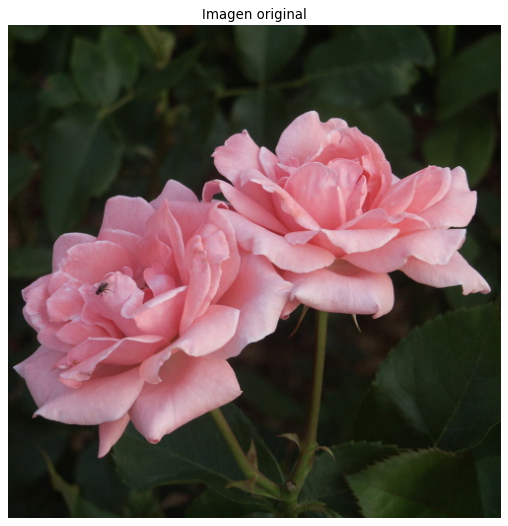

In [17]:
figure(figsize=(8, 8), dpi=80)
plt.imshow( img )
plt.axis('off')
plt.title("Imagen original")
plt.show()

In [18]:
img2 = cv2.imread("histograms/Strokes.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

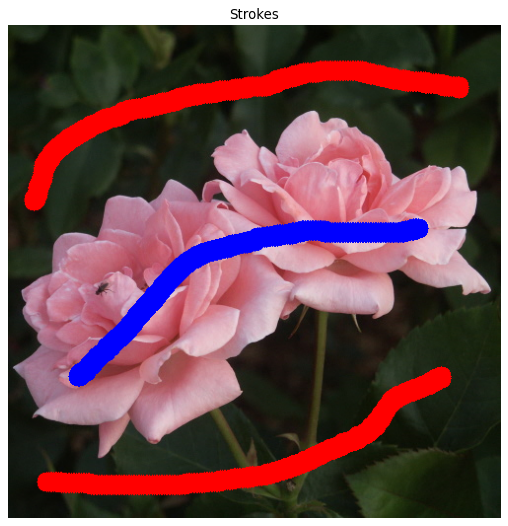

In [19]:
figure(figsize=(8, 8), dpi=80)
plt.imshow( img2 )
plt.axis('off')
plt.title("Strokes")
plt.show()

In [20]:
img_seg = np.zeros(img.shape)

In [21]:
####### Aqui utilizamos la función f  ####################
eps = 0.01

rojo = np.array([255,0,0])
azul = np.array([0,0,255])

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        bin_x = int(float(img[i,j,0])/256.0*bins)
        bin_y = int(float(img[i,j,1])/256.0*bins)
        bin_z = int(float(img[i,j,2])/256.0*bins)
        
        c = np.array([bin_x,bin_y,bin_z])
        
        F1 =  (f(c,alfa1,mu1,sigma,bins) + eps)/(f(c,alfa1,mu1,sigma,bins) + f(c,alfa2,mu2,sigma,bins) + 2*eps)
        F2 =  (f(c,alfa2,mu2,sigma,bins) + eps)/(f(c,alfa1,mu1,sigma,bins) + f(c,alfa2,mu2,sigma,bins) + 2*eps)
        
        if F1 < F2:
            img_seg[i,j,:] = azul
        else:
            img_seg[i,j,:] = rojo

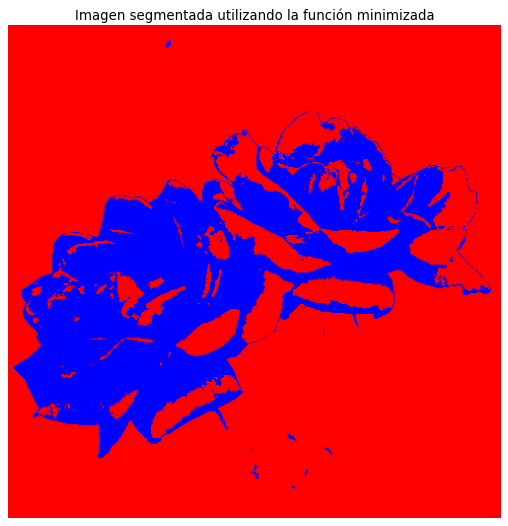

In [22]:
figure(figsize=(8, 8), dpi=80)
plt.imshow( np.array(img_seg,dtype=np.uint8) )
plt.axis('off')
plt.title("Imagen segmentada utilizando la función minimizada")
plt.show()

In [23]:
img_seg2 = np.zeros(img.shape)

In [24]:
##### Aqui utilizamos el histograma H

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        bin_x = int(float(img[i,j,0])/256.0*bins)
        bin_y = int(float(img[i,j,1])/256.0*bins)
        bin_z = int(float(img[i,j,2])/256.0*bins)
        
        F1 =  (hist_0[bin_x,bin_y,bin_z] + eps)/(hist_0[bin_x,bin_y,bin_z] + hist_1[bin_x,bin_y,bin_z] + 2*eps)
        F2 =  (hist_1[bin_x,bin_y,bin_z] + eps)/(hist_0[bin_x,bin_y,bin_z] + hist_1[bin_x,bin_y,bin_z] + 2*eps)
        
        if F1 < F2:
            img_seg2[i,j,:] = azul
        else:
            img_seg2[i,j,:] = rojo

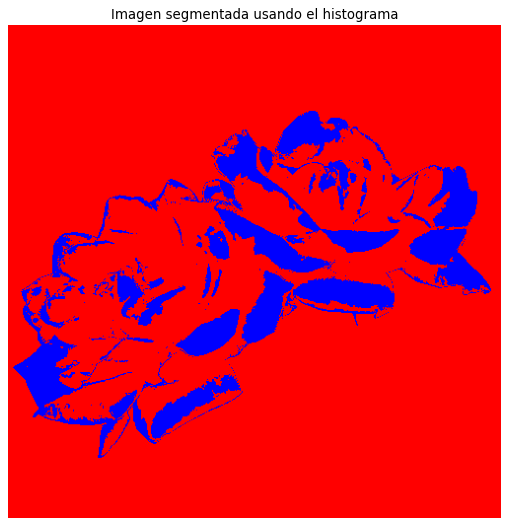

In [25]:
figure(figsize=(8, 8), dpi=80)
plt.imshow( np.array(img_seg2,dtype=np.uint8) )
plt.axis('off')
plt.title("Imagen segmentada usando el histograma")
plt.show()